# 데이터 정의

In [ ]:
import numpy as np

loaded_data = np.loadtxt('/content/diabetes.csv', delimiter=',')

x_train_np = loaded_data[ : , 0:-1]
y_train_np = loaded_data[ : , [-1]]

print('loaded_data.shape = ', loaded_data.shape)
print('x_train_np.shape = ', x_train_np.shape)
print('y_train_np.shape = ', y_train_np.shape)

loaded_data.shape =  (759, 9)
x_train_np.shape =  (759, 8)
y_train_np.shape =  (759, 1)


In [ ]:
import torch
from torch import nn

x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

# 신경망 모델 구축

In [ ]:
class MyLogisticRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.logistic_stack = nn.Sequential(
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, data):
        prediction = self.logistic_stack(data)

        return prediction

In [ ]:
model = MyLogisticRegressionModel()

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0402,  0.3074,  0.2096, -0.2859,  0.2837, -0.2986, -0.0589,  0.1638]],
       requires_grad=True)
Parameter containing:
tensor([-0.0648], requires_grad=True)


# 손실함수 및 옵티마이저 설정

In [ ]:
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [ ]:
train_loss_list = []
train_accuracy_list = []

nums_epoch = 5000

for epoch in range(nums_epoch+1):

    outputs = model(x_train)

    loss = loss_function(outputs, y_train)

    train_loss_list.append(loss.item())

    prediction = outputs > 0.5
    correct = (prediction.float() == y_train)
    accuracy = correct.sum().item() / len(correct)

    train_accuracy_list.append(accuracy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch = ', epoch, ' current loss = ', loss.item(), ' accuracy = ', accuracy)

epoch =  0  current loss =  0.7134889960289001  accuracy =  0.4176548089591568
epoch =  100  current loss =  0.5817582011222839  accuracy =  0.6613965744400527
epoch =  200  current loss =  0.5437836647033691  accuracy =  0.7220026350461133
epoch =  300  current loss =  0.5217965245246887  accuracy =  0.7562582345191041
epoch =  400  current loss =  0.5080538392066956  accuracy =  0.7654808959156785
epoch =  500  current loss =  0.49893638491630554  accuracy =  0.769433465085639
epoch =  600  current loss =  0.4926115572452545  accuracy =  0.7681159420289855
epoch =  700  current loss =  0.48807403445243835  accuracy =  0.7720685111989459
epoch =  800  current loss =  0.4847329556941986  accuracy =  0.7733860342555995
epoch =  900  current loss =  0.482221394777298  accuracy =  0.769433465085639
epoch =  1000  current loss =  0.4803006947040558  accuracy =  0.7681159420289855
epoch =  1100  current loss =  0.4788101315498352  accuracy =  0.769433465085639
epoch =  1200  current loss = 

In [ ]:
for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

logistic_stack Parameter containing:
tensor([[-0.8957, -3.5653,  0.3269, -0.5836, -0.3295, -2.4878, -1.0019, -0.0910]],
       requires_grad=True)
logistic_stack Parameter containing:
tensor([0.1470], requires_grad=True)


In [ ]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.8957, -3.5653,  0.3269, -0.5836, -0.3295, -2.4878, -1.0019, -0.0910]],
       requires_grad=True)
Parameter containing:
tensor([0.1470], requires_grad=True)


# 손실 및 정확도 추세

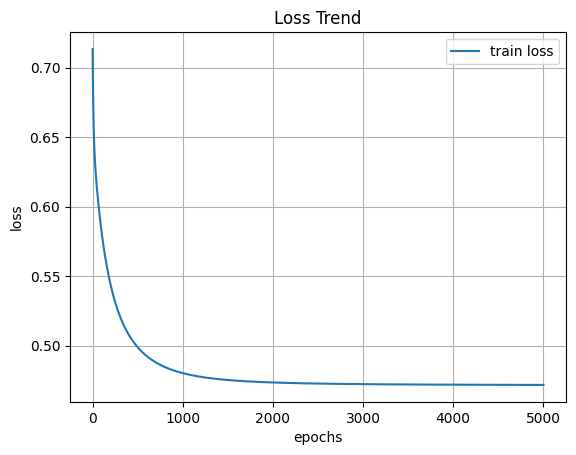

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(train_loss_list, label='train loss')
plt.legend(loc='best')

plt.show()

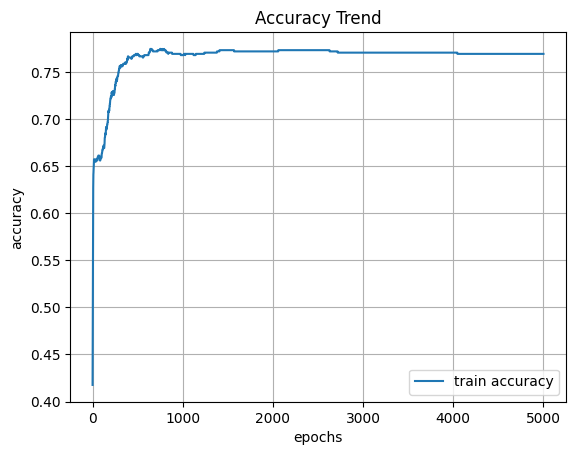

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='train accuracy')
plt.legend(loc='best')

plt.show()